<a href="https://colab.research.google.com/github/AnthonyDest/Spam-Email-Detection/blob/svm/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('spam_dataset.csv')

X = data['text']  # Features - the email text
y = data['label_num']  # Target variable - spam or not spam

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
x_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)

In [4]:
# Example of a basic logistic regression model
from sklearn.svm import SVC

basic_model = SVC()
basic_model.fit(X_train, y_train)

y_pred = basic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9903381642512077
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-5, 2, 100),  # Regularization parameter
    'gamma': np.logspace(-5, 2, 100),  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': randint(2, 5)  # Degree of the polynomial kernel
}

# Create the randomized search
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Use the best estimator directly to make predictions
best_svm = random_search.best_estimator_
predictions = best_svm.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 7.390722033525775, 'degree': 2, 'gamma': 0.8902150854450375, 'kernel': 'rbf'}
Best Score: 0.9857344806033097


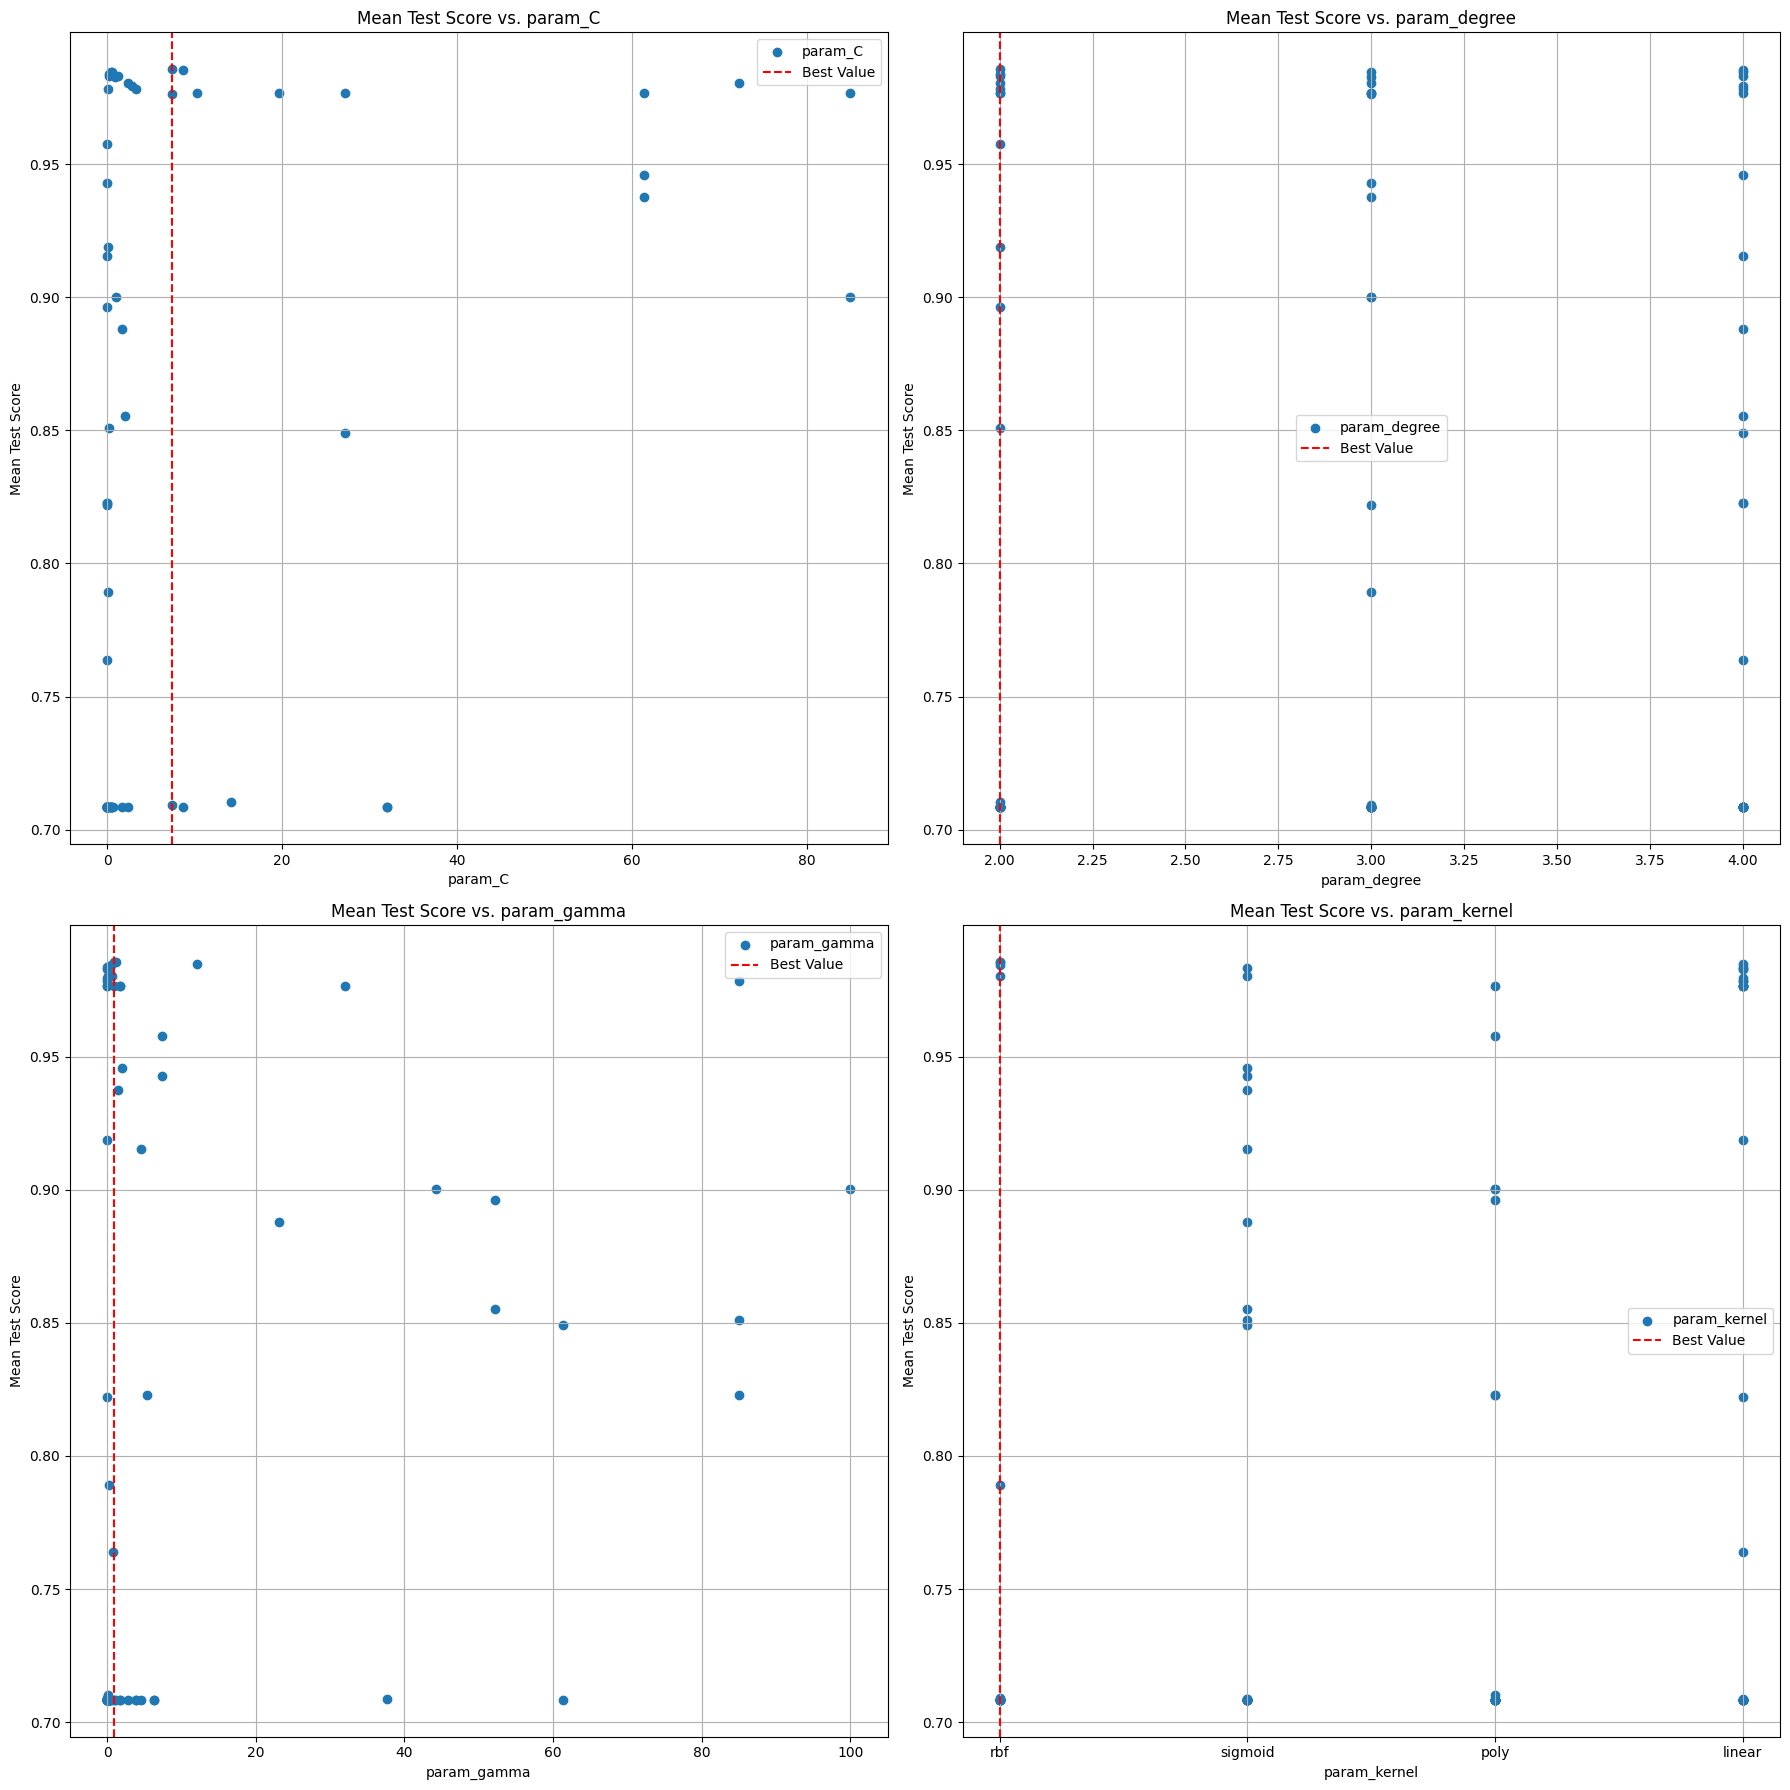

In [13]:
# Convert cv_results_ to DataFrame
cv_results_df = pd.DataFrame(random_search.cv_results_)

# Extract relevant columns
param_columns = [col for col in cv_results_df.columns if col.startswith("param_")]
mean_test_score = cv_results_df["mean_test_score"]

# Plot the data for each hyperparameter separately
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

for i, param_col in enumerate(param_columns):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    # ax.plot(cv_results_df[param_col], mean_test_score, marker='o', label=param_col)
    ax.scatter(cv_results_df[param_col], mean_test_score, label=param_col)
    # Highlight the best value
    best_index = cv_results_df["mean_test_score"].idxmax()
    best_value = cv_results_df[param_col][best_index]
    if best_value == None:
        best_value = -1
    ax.axvline(x=best_value, color='r', linestyle='--', label='Best Value')

    ax.set_xlabel(param_col)
    ax.set_ylabel("Mean Test Score")
    ax.set_title("Mean Test Score vs. " + param_col)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [14]:
best_model = SVC()
best_model.set_params(**random_search.best_params_)
best_model.fit(X_train, y_train)

SVC(C=7.390722033525775, degree=2, gamma=0.8902150854450375)

In [17]:
# Default Model:
basic_model_pred = basic_model.predict(X_test)

# # Calculate accuracy for the basic Logistic Regression model
basic_model_accuracy = accuracy_score(y_test, basic_model_pred)
print(f"Basic Model Accuracy: {basic_model_accuracy:.4f}")

# Tuned Model:
best_model_pred = best_model.predict(X_test)

# Calculate accuracy for the tuned Logistic Regression model
best_model_accuracy = accuracy_score(y_test, best_model_pred)
print(f"Tuned SVM Model Accuracy: {best_model_accuracy:.4f}")

# Show improvement
print("\nImprovement in accuracy:")
print(f"SVM Model: {best_model_accuracy - basic_model_accuracy:.4f}")

Basic Model Accuracy: 0.9903
Tuned SVM Model Accuracy: 0.9903

Improvement in accuracy:
SVM Model: 0.0000
